<a href="https://colab.research.google.com/github/angel870326/Monthly-Revenue-Forecasting/blob/main/011_rnn_lstm_v7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> 2023.04.19 Ssu-Yun Wang<br/>
[Github @angel870326](https://github.com/angel870326)

# **Monthly Revenue Forecasting with RNN & LSTM - Results**

### Contents

##### 1. Input Data
##### 5. Model Training
*  預先訓練多個模型並儲存
*  Training History

##### 7. Predicting Results & Feature Importance
*  Output Functions
*  RNN
*  LSTM
*  Scores (RMSE, MAPE, MAE, MAE%)

##### 8. Plots
*  Expected v.s. Predicted
*  Scores: RMSE, MAPE, MAE, MAE%
*  Feature Importance

##### 9. Best and Worst Model
*  各模型組合中，預測最好和最差的月份
*  RNN 和 LSTM 各自預測最好和最差的模型組合
*  所有模型組合中，預測最好和最差的模型組合


## **0. Setup**

In [ ]:
# sConnect to the Google Drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import os
import pandas as pd
import numpy as np

In [ ]:
!pip install import_ipynb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.3 MB/s eta 0:00:00


In [ ]:
import import_ipynb
%cd '/content/gdrive/Shareddrives/Me/論文/code/Function'

/content/gdrive/MyDrive/論文/code/Function


In [ ]:
from MonRevForecast import predictMonthlyRevenueNN, BestWorstModelNN, trainMonthlyRevenueNN

importing Jupyter notebook from MonRevForecast.ipynb


In [ ]:
from MonRevPlot import plotExpectedPredictedRevenues, plotModelExpectedPredictedRevenues

importing Jupyter notebook from MonRevPlot.ipynb


In [ ]:
from MonRevPlot import plotAllScores, compareModelScore, scoreBoxplotV

In [ ]:
from MonRevForecast import plotTrainingHistory

### **Project Path**

In [ ]:
project_path = '/content/gdrive/Shareddrives/Me/論文'

## **1. Input Data**

【**月營收盈餘 (2015-2022)**】

資料期間：2015年1月至2022年12月（共96個月）

資料範圍：上市、櫃公司（排除金融業、生技醫療、建材營造、DR和KY公司）

資料來源：TEJ Company DB、公開資訊觀測站


In [ ]:
org_data = pd.read_excel(os.path.join(project_path, '資料集/007_v1/201501-202212上市櫃公司月營收_非金融業.xlsx'), index_col=0)
org_data.columns = pd.to_datetime(org_data.columns, format="%Y-%m-%d").to_period('M')
org_data

,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
公司,,,,,,,,,,,,,,,,,,,,,
1101 台泥,8921719,4823318,7695107,8468346,7989971,8545853,8250361,7397417,7026214,8081068,...,9971650,8319342,7733787,9145989,10102468,10689860,10404901,11368096,9674576,12584154
1102 亞泥,6851825,3279346,5274419,5767824,5623713,5516532,5746639,5512417,5546527,5901983,...,8160414,8710220,8000427,7776413,7864622,7069221,6994078,7601097,8306062,8340507
1103 嘉泥,310280,160324,200719,273126,320563,143719,175596,184087,189109,321446,...,220463,168089,163521,183177,178825,182371,205264,209429,221763,228644
1104 環泥,520536,335531,471332,447811,371720,411286,412816,376087,423675,461991,...,591593,638493,537082,573028,580420,605512,597159,634981,631827,725055
1108 幸福,518826,341533,431529,432670,471084,441613,463001,329405,340734,396102,...,345612,335518,332258,334113,326691,390053,346635,401202,383773,418326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9951 皇田,284990,251041,279617,333189,321941,300731,289975,300810,347401,333945,...,374229,302262,323433,371791,337581,468608,464373,432835,500111,506796
9955 佳龍,301850,131575,325762,152812,262623,193277,102874,172944,172431,177217,...,96200,101850,95096,80726,85625,81881,79179,80630,91270,84115
9958 世紀鋼,200493,217812,272212,194423,235272,271207,184345,272110,256634,282106,...,626104,401960,673479,665459,651699,757968,903198,911834,944060,1082675


In [ ]:
print("Data shape:", org_data.shape)
print("Data size:", org_data.size)

Data shape: (1308, 96)
Data size: 125568


## **5. Model Training**

### **5.2.3 預先訓練多個模型並儲存**


In [ ]:
model_save_path_rnn = os.path.join(project_path, 'model/rnn')
model_save_path_lstm = os.path.join(project_path, 'model/lstm')

In [ ]:
# test_y_1 = 2020 
# test_y_2 = 2021
# test_y_3 = 2022
# start_m_1 = 1
# end_m_1 = 6
# start_m_2 = 7
# end_m_2 = 12

#### **RNN**

2020 (6.5 hr. with CPU)

In [ ]:
# trainMonthlyRevenueNN(org_data, test_y_1, start_m_1, test_y_1, end_m_1, 'rnn', model_save_path_rnn)

2020-01 model saved. Using time: 1958.990  secs.
2020-02 model saved. Using time: 1912.077  secs.
2020-03 model saved. Using time: 1969.881  secs.
2020-04 model saved. Using time: 1885.617  secs.
2020-05 model saved. Using time: 2023.281  secs.
2020-06 model saved. Using time: 1944.662  secs.


In [ ]:
# trainMonthlyRevenueNN(org_data, test_y_1, start_m_2, test_y_1, end_m_2, 'rnn', model_save_path_rnn)

2020-07 model saved. Using time: 1863.321  secs.
2020-08 model saved. Using time: 1927.502  secs.
2020-09 model saved. Using time: 2001.427  secs.
2020-10 model saved. Using time: 1930.129  secs.
2020-11 model saved. Using time: 1993.950  secs.
2020-12 model saved. Using time: 1860.813  secs.


2021 (7.5 hr. with CPU)

In [ ]:
# trainMonthlyRevenueNN(org_data, test_y_2, start_m_1, test_y_2, end_m_1, 'rnn', model_save_path_rnn)

2021-01 model saved. Using time: 2166.625  secs.
2021-02 model saved. Using time: 2460.812  secs.
2021-03 model saved. Using time: 2164.226  secs.
2021-04 model saved. Using time: 2112.604  secs.
2021-05 model saved. Using time: 2270.330  secs.
2021-06 model saved. Using time: 2203.214  secs.


In [ ]:
# trainMonthlyRevenueNN(org_data, test_y_2, start_m_2, test_y_2, end_m_2, 'rnn', model_save_path_rnn)

2021-07 model saved. Using time: 2261.399  secs.
2021-08 model saved. Using time: 2271.474  secs.
2021-09 model saved. Using time: 2310.682  secs.
2021-10 model saved. Using time: 1961.445  secs.
2021-11 model saved. Using time: 2301.373  secs.
2021-12 model saved. Using time: 2275.933  secs.


2022 (6.2 hr. with CPU)

In [ ]:
# trainMonthlyRevenueNN(org_data, test_y_3, start_m_1, test_y_3, end_m_1, 'rnn', model_save_path_rnn)

2022-01 model saved. Using time: 1904.453  secs.
2022-02 model saved. Using time: 1806.593  secs.
2022-03 model saved. Using time: 1901.659  secs.
2022-04 model saved. Using time: 1827.661  secs.
2022-05 model saved. Using time: 1808.865  secs.
2022-06 model saved. Using time: 1846.181  secs.


In [ ]:
# trainMonthlyRevenueNN(org_data, test_y_3, start_m_2, test_y_3, end_m_2, 'rnn', model_save_path_rnn)

2022-07 model saved. Using time: 1843.031  secs.
2022-08 model saved. Using time: 1881.579  secs.
2022-09 model saved. Using time: 1772.704  secs.
2022-10 model saved. Using time: 1830.740  secs.
2022-11 model saved. Using time: 1829.999  secs.
2022-12 model saved. Using time: 1934.922  secs.


#### **LSTM**

2020 (7 hr. with CPU)

In [ ]:
# trainMonthlyRevenueNN(org_data, test_y_1, start_m_1, test_y_1, end_m_1, 'lstm', model_save_path_lstm)

2020-01 model saved. Using time: 2074.558  secs.
2020-02 model saved. Using time: 2027.584  secs.
2020-03 model saved. Using time: 2087.383  secs.
2020-04 model saved. Using time: 1978.781  secs.
2020-05 model saved. Using time: 2100.974  secs.
2020-06 model saved. Using time: 2147.426  secs.


In [ ]:
# trainMonthlyRevenueNN(org_data, test_y_1, start_m_2, test_y_1, end_m_2, 'lstm', model_save_path_lstm)

2020-07 model saved. Using time: 2212.522  secs.
2020-08 model saved. Using time: 2144.583  secs.
2020-09 model saved. Using time: 2142.052  secs.
2020-10 model saved. Using time: 2139.156  secs.
2020-11 model saved. Using time: 2135.365  secs.
2020-12 model saved. Using time: 2095.624  secs.


2021 (4.5 hr. with CPU)

In [ ]:
# trainMonthlyRevenueNN(org_data, test_y_2, start_m_1, test_y_2, end_m_1, 'lstm', model_save_path_lstm)

2021-01 model saved. Using time: 1413.228  secs.
2021-02 model saved. Using time: 1536.723  secs.
2021-03 model saved. Using time: 1476.730  secs.
2021-04 model saved. Using time: 1445.626  secs.
2021-05 model saved. Using time: 1483.705  secs.
2021-06 model saved. Using time: 1474.781  secs.


In [ ]:
# trainMonthlyRevenueNN(org_data, test_y_2, start_m_2, test_y_2, end_m_2, 'lstm', model_save_path_lstm)

2021-07 model saved. Using time: 1457.882  secs.
2021-08 model saved. Using time: 1393.991  secs.
2021-09 model saved. Using time: 1457.223  secs.
2021-10 model saved. Using time: 1516.899  secs.
2021-11 model saved. Using time: 1517.633  secs.
2021-12 model saved. Using time: 1354.522  secs.


2022 (6 hr. with CPU)

In [ ]:
# trainMonthlyRevenueNN(org_data, test_y_3, start_m_1, test_y_3, end_m_1, 'lstm', model_save_path_lstm)

2022-01 model saved. Using time: 1881.828  secs.
2022-02 model saved. Using time: 2100.890  secs.
2022-03 model saved. Using time: 1936.591  secs.
2022-04 model saved. Using time: 2001.834  secs.
2022-05 model saved. Using time: 1928.523  secs.
2022-06 model saved. Using time: 2021.975  secs.


In [ ]:
# trainMonthlyRevenueNN(org_data, test_y_3, start_m_2, test_y_3, end_m_2, 'lstm', model_save_path_lstm)

2022-07 model saved. Using time: 1961.589  secs.
2022-08 model saved. Using time: 2020.060  secs.
2022-09 model saved. Using time: 1907.927  secs.
2022-10 model saved. Using time: 2023.116  secs.
2022-11 model saved. Using time: 1921.989  secs.
2022-12 model saved. Using time: 1918.864  secs.


### **5.2.4 Training History**

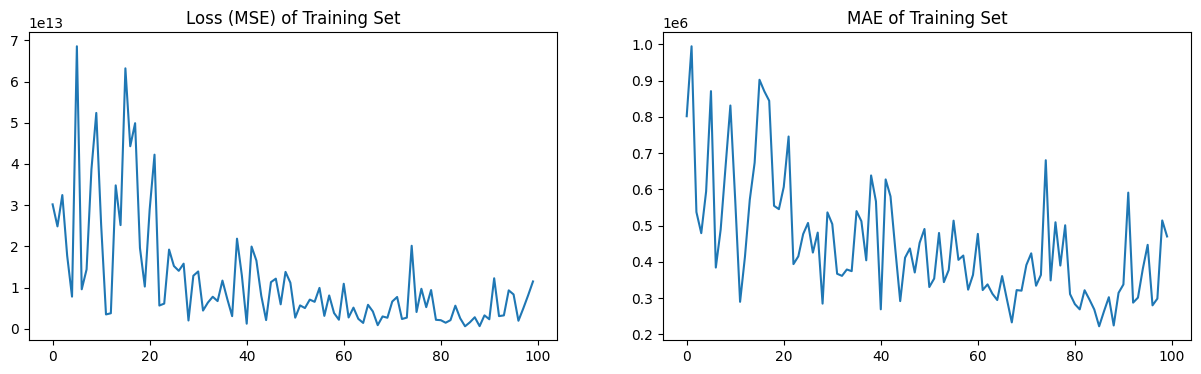

In [ ]:
# RNN
model_save_path_rnn = os.path.join(project_path, 'model/rnn')
plotTrainingHistory(model_save_path_rnn, '2022-12', 'model')

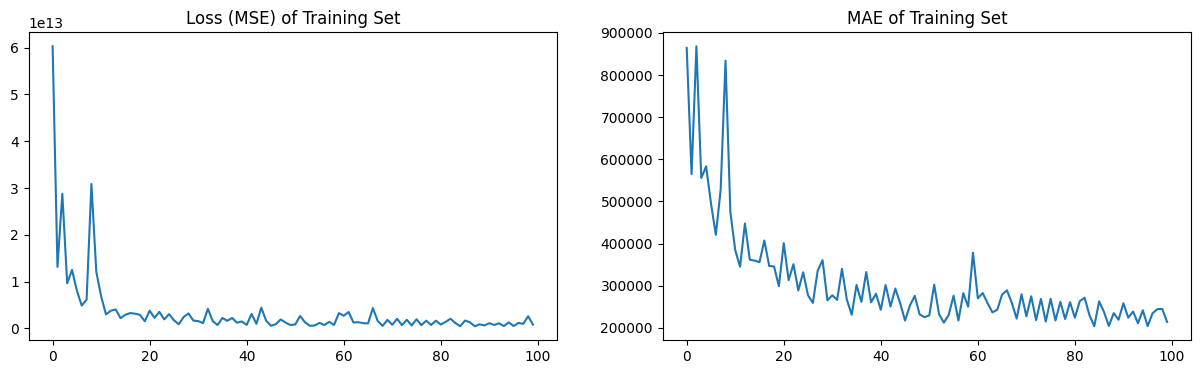

In [ ]:
# LSTM
model_save_path_lstm = os.path.join(project_path, 'model/lstm')
plotTrainingHistory(model_save_path_lstm, '2022-12', 'model')

## **7. Predicting Results**


||訓練資料X|訓練資料y|測試資料X|測試資料y|
|---|---|---|---|---|
|Start|2015-01 - 2018-12|2019-01|2016-01 - 2019-12|**2020-01**|
|End|2017-12 - 2021-11|2021-12|2018-12 - 2022-11|**2022-12**|

In [ ]:
# 預測年月
start_y = 2020
start_m = 1
end_y = 2022
end_m = 12

### **7.1 Output Functions**

In [ ]:
# Output data path
output_data_path = '/content/gdrive/Shareddrives/Me/論文/Results'

In [ ]:
# Output
def outputPredictingResults(category: str, modelName: str, pred: dict):
    pred['org']['org'].to_excel(os.path.join(output_data_path, f'{category}/org_pred_{modelName}_{category}.xlsx'))
    pred['org']['dec'].to_excel(os.path.join(output_data_path, f'{category}/dec_pred_{modelName}_{category}.xlsx'))
    pred['org']['season'].to_excel(os.path.join(output_data_path, f'{category}/season_pred_{modelName}_{category}.xlsx'))
    pred['def']['org'].to_excel(os.path.join(output_data_path, f'{category}/def_pred_{modelName}_{category}.xlsx'))
    pred['def']['dec'].to_excel(os.path.join(output_data_path, f'{category}/dec_def_pred_{modelName}_{category}.xlsx'))
    pred['def']['season'].to_excel(os.path.join(output_data_path, f'{category}/season_def_pred_{modelName}_{category}.xlsx'))

def outputScores(category: str, modelName: str, scoresD: pd.DataFrame):
    scoresD.to_excel(os.path.join(output_data_path, f'{category}/scores_{modelName}_{category}.xlsx'))

### **7.2 RNN**

In [ ]:
# Load trained model
model_save_path_rnn = os.path.join(project_path, 'model/rnn')

In [ ]:
# RNN (6 min.)
pred_rnn, scores_rnn = predictMonthlyRevenueNN(org_data, start_y, start_m, end_y, end_m, 'rnn', model_save_path_rnn)

Using time: 333.770  secs.


In [ ]:
# Output
outputPredictingResults('2015', 'rnn', pred_rnn)
outputScores('2015', 'rnn', scores_rnn)

#### **7.2.1 Predicting Results**

In [ ]:
# Original
print(pred_rnn['org']['org'].shape)
print(pred_rnn['org']['dec'].shape)
print(pred_rnn['org']['season'].shape)
pred_rnn['org']['org'].head(4)

(1308, 36)
(1308, 36)
(1308, 36)


,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
1101 台泥,9639908.0,7425656.0,10145296.0,9135361.0,9772626.0,9579020.0,10047072.0,9576664.0,10800889.0,11712071.0,...,9153859.0,9056316.0,8671593.0,8702730.0,8816121.0,8748135.0,9849084.0,10588113.0,10920855.0,12000096.0
1102 亞泥,6810219.0,5341686.0,7048192.0,6360777.0,6671184.0,6784598.0,6841430.0,6675001.0,7300212.0,7726996.0,...,7373958.0,7917948.0,7506031.0,8114724.0,7715331.0,8158402.0,8546643.0,8120754.0,8854497.0,9169152.0
1103 嘉泥,128661.0,134222.0,146464.0,160470.0,185978.0,157291.0,171773.0,156126.0,214690.0,176748.0,...,179948.0,185535.0,180274.0,194516.0,192590.0,173175.0,186061.0,193771.0,210234.0,230088.0
1104 環泥,384773.0,308876.0,409977.0,387484.0,423958.0,426335.0,424592.0,421225.0,427503.0,491234.0,...,516186.0,535562.0,521593.0,605143.0,578668.0,560468.0,664413.0,584776.0,641020.0,701428.0


In [ ]:
# Deflating
print(pred_rnn['def']['org'].shape)
print(pred_rnn['def']['dec'].shape)
print(pred_rnn['def']['season'].shape)
pred_rnn['def']['org'].head(4)

(1308, 36)
(1308, 36)
(1308, 36)


,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
1101 台泥,12006178.0,5372336.0,9493185.0,9145852.0,9543701.0,10058332.0,10355235.0,9643495.0,10796383.0,10743509.0,...,8922022.0,9314563.0,9208848.0,8824603.0,8129888.0,10081148.0,9473972.0,9104017.0,11425707.0,11568347.0
1102 亞泥,8264128.0,3205737.0,6402036.0,6254092.0,6088085.0,7161267.0,6736800.0,6506484.0,7261724.0,7097340.0,...,7705608.0,7891435.0,8443392.0,9001306.0,8690933.0,7606746.0,7521326.0,8243609.0,8950602.0,9516866.0
1103 嘉泥,168452.0,137353.0,178267.0,159526.0,166211.0,118362.0,182107.0,177211.0,180457.0,190214.0,...,187783.0,197703.0,176931.0,142320.0,174829.0,193506.0,190132.0,190492.0,229572.0,205485.0
1104 環泥,575968.0,251076.0,455310.0,444415.0,469728.0,376404.0,465812.0,522458.0,444026.0,489165.0,...,586381.0,546594.0,571427.0,552745.0,605231.0,608338.0,626029.0,559434.0,643847.0,686143.0


### **7.3 LSTM**


In [ ]:
# Load trained models
model_save_path_lstm = os.path.join(project_path, 'model/lstm')

In [ ]:
# LSTM (6 min.)
pred_lstm, scores_lstm = predictMonthlyRevenueNN(org_data, start_y, start_m, end_y, end_m, 'lstm', model_save_path_lstm)

Using time: 367.619  secs.


In [ ]:
# Output
outputPredictingResults('2015', 'lstm', pred_lstm)
outputScores('2015', 'lstm', scores_lstm)

#### **7.3.1 Predicting Results**

In [ ]:
print(pred_lstm['org']['org'].shape)
print(pred_lstm['org']['dec'].shape)
print(pred_lstm['org']['season'].shape)
pred_lstm['org']['org'].head(4)

(1308, 36)
(1308, 36)
(1308, 36)


,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
1101 台泥,9817227.0,7523930.0,9572491.0,9483733.0,10287052.0,9672952.0,9813970.0,9589388.0,10687711.0,10672628.0,...,10107340.0,9827327.0,8989103.0,8659004.0,8488267.0,9206742.0,10794495.0,10906994.0,11214336.0,12052079.0
1102 亞泥,7020634.0,5328656.0,6637466.0,6527726.0,6981479.0,6438672.0,6755414.0,6705778.0,7059508.0,7188099.0,...,8265683.0,7846426.0,7991888.0,8310197.0,7363277.0,7906102.0,9122497.0,8262042.0,8720282.0,9389388.0
1103 嘉泥,178363.0,139053.0,158853.0,126520.0,194056.0,133745.0,175153.0,131046.0,186556.0,184314.0,...,200915.0,184532.0,181667.0,192862.0,162796.0,183342.0,194805.0,202547.0,210410.0,229503.0
1104 環泥,410904.0,306458.0,401608.0,397269.0,432836.0,405927.0,418003.0,416554.0,464100.0,466699.0,...,573676.0,509427.0,524696.0,550731.0,504206.0,576814.0,690660.0,614661.0,664693.0,670142.0


In [ ]:
print(pred_lstm['def']['org'].shape)
print(pred_lstm['def']['dec'].shape)
print(pred_lstm['def']['season'].shape)
pred_lstm['def']['org'].head(4)

(1308, 36)
(1308, 36)
(1308, 36)


,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
1101 台泥,10998020.0,5474609.0,8993006.0,9339176.0,9952741.0,10130158.0,11207660.0,9823622.0,10789154.0,10893419.0,...,8589209.0,9436276.0,8506476.0,9074370.0,8216538.0,9300966.0,9849375.0,10064201.0,11930984.0,12040552.0
1102 亞泥,8172037.0,2835260.0,6095263.0,6216460.0,6568500.0,7169874.0,7399141.0,6483118.0,7369608.0,7296658.0,...,7928024.0,7921189.0,8795189.0,8666769.0,8351188.0,7762716.0,6902245.0,7615964.0,8218246.0,10023013.0
1103 嘉泥,174910.0,120077.0,169762.0,186570.0,163204.0,145042.0,182664.0,175278.0,168136.0,191863.0,...,173039.0,221113.0,174668.0,139970.0,179818.0,190216.0,176874.0,201851.0,221805.0,218884.0
1104 環泥,537768.0,244009.0,444869.0,446324.0,432942.0,386893.0,448340.0,514257.0,447046.0,444039.0,...,600275.0,613655.0,583596.0,456341.0,567986.0,594041.0,589548.0,588912.0,620375.0,705411.0


### **7.4 Scores**

In [ ]:
# RNN
scores_rnn

,RMSE-org,MAE-org,MAE%-org,MAPE-org,RMSE-def,MAE-def,MAE%-def,MAPE-def,RMSE-dec,MAE-dec,...,MAE%-dec_def,MAPE-dec_def,RMSE-season,MAE-season,MAE%-season,MAPE-season,RMSE-season_def,MAE-season_def,MAE%-season_def,MAPE-season_def
2020-01,2777943.0,335507.0,0.2030,0.3771,2163867.0,340130.0,0.2058,0.4880,2898185.0,382546.0,...,0.1992,0.3986,2637285.0,376933.0,0.2280,0.4557,2094870.0,291831.0,0.1766,0.5510
2020-02,2631707.0,310980.0,0.2375,0.8729,1736696.0,263997.0,0.2016,0.6227,2126963.0,270594.0,...,0.1663,0.4832,2311481.0,324363.0,0.2477,0.7336,4040004.0,399206.0,0.3049,0.6929
2020-03,1632719.0,252113.0,0.1440,0.5373,958399.0,195782.0,0.1119,0.3841,1523148.0,267635.0,...,0.1162,0.3387,2310047.0,267071.0,0.1526,0.5205,2840689.0,268853.0,0.1536,0.5335
2020-04,1222298.0,239260.0,0.1381,0.7328,2774413.0,329867.0,0.1903,0.6025,1599393.0,315467.0,...,0.1345,0.5334,1717658.0,272660.0,0.1573,0.6976,2238651.0,312691.0,0.1804,0.6501
2020-05,1216711.0,227478.0,0.1295,1.5316,1019261.0,185011.0,0.1053,1.5914,1284410.0,237730.0,...,0.0980,1.4803,1874590.0,279135.0,0.1589,1.9242,1218503.0,200282.0,0.1140,1.1979
2020-06,1387899.0,253019.0,0.1375,0.4996,2517666.0,226760.0,0.1233,0.2719,1351800.0,234872.0,...,0.1018,0.2671,2149532.0,308139.0,0.1675,0.4662,2130708.0,247007.0,0.1343,0.3759
2020-07,1150483.0,239924.0,0.1254,0.4912,1703693.0,195784.0,0.1024,0.3419,1183992.0,240609.0,...,0.0778,0.3265,1283537.0,269225.0,0.1408,0.5043,1113554.0,222119.0,0.1161,0.4120
2020-08,1274230.0,224997.0,0.1160,0.6256,832212.0,158428.0,0.0817,0.2295,1063503.0,211057.0,...,0.0748,0.2412,1624279.0,296736.0,0.1530,0.7487,1235105.0,219902.0,0.1134,0.4464
2020-09,2997327.0,344602.0,0.1636,0.7105,1258066.0,177310.0,0.0842,0.3059,2727756.0,338513.0,...,0.0842,0.3832,1015771.0,268066.0,0.1272,0.7442,1317935.0,277208.0,0.1316,0.3317
2020-10,1995011.0,217646.0,0.1013,0.7047,2801535.0,263263.0,0.1225,0.3831,1631320.0,228227.0,...,0.1161,0.4600,3751002.0,330629.0,0.1539,0.8430,6012066.0,383291.0,0.1784,0.4605


In [ ]:
# LSTM
scores_lstm

,RMSE-org,MAE-org,MAE%-org,MAPE-org,RMSE-def,MAE-def,MAE%-def,MAPE-def,RMSE-dec,MAE-dec,...,MAE%-dec_def,MAPE-dec_def,RMSE-season,MAE-season,MAE%-season,MAPE-season,RMSE-season_def,MAE-season_def,MAE%-season_def,MAPE-season_def
2020-01,2337282.0,376796.0,0.2280,0.5070,1263513.0,255450.0,0.1545,0.4505,2278499.0,337486.0,...,0.1967,0.4173,2489104.0,356474.0,0.2157,0.4870,1431862.0,262348.0,0.1587,0.5213
2020-02,2653294.0,333291.0,0.2546,0.9554,1396139.0,230113.0,0.1757,0.5668,2147605.0,265552.0,...,0.1709,0.4563,2639152.0,317997.0,0.2429,0.7664,4516829.0,400487.0,0.3059,0.7000
2020-03,1168805.0,221367.0,0.1265,0.5121,1528464.0,206161.0,0.1178,0.3492,1352513.0,271601.0,...,0.1291,0.3747,3165030.0,341520.0,0.1951,0.5707,2785645.0,248863.0,0.1422,0.4797
2020-04,1280550.0,241820.0,0.1395,0.6649,1898639.0,285557.0,0.1648,0.4918,1326477.0,260480.0,...,0.1482,0.5720,1676502.0,285886.0,0.1650,0.6717,1691063.0,271875.0,0.1569,0.5538
2020-05,1060708.0,205167.0,0.1168,2.1342,1454654.0,199599.0,0.1136,1.2976,1185205.0,238698.0,...,0.0893,1.1213,2006398.0,309343.0,0.1760,2.7396,1220718.0,209080.0,0.1190,1.4732
2020-06,1699733.0,294959.0,0.1603,0.4853,2426968.0,229489.0,0.1247,0.2397,1438917.0,268579.0,...,0.0921,0.2967,2291098.0,320627.0,0.1743,0.5140,2170200.0,244987.0,0.1332,0.3464
2020-07,1283518.0,241496.0,0.1263,0.4613,1013402.0,160384.0,0.0838,0.2955,1270688.0,266126.0,...,0.0730,0.3147,1758305.0,325168.0,0.1700,0.5702,1143384.0,213600.0,0.1117,0.3923
2020-08,1233247.0,235227.0,0.1213,0.5369,802966.0,155761.0,0.0803,0.2458,1103347.0,216179.0,...,0.0739,0.3330,1552506.0,293603.0,0.1514,0.7776,1133130.0,197038.0,0.1016,0.5028
2020-09,2711739.0,315693.0,0.1498,0.6903,839527.0,168073.0,0.0798,0.3094,2179528.0,332316.0,...,0.0965,0.3365,900044.0,225578.0,0.1071,0.3870,1288146.0,276453.0,0.1312,0.3813
2020-10,2159198.0,250360.0,0.1165,0.3815,2381806.0,223895.0,0.1042,0.4353,1722347.0,245117.0,...,0.1045,0.5492,4990282.0,356031.0,0.1657,0.5975,6268729.0,383561.0,0.1785,0.5580


## **8. Plots**

y_train = y_test 往前推 12 個月

### **8.1 Expected v.s. Predicted**

#### **8.1.1 All**

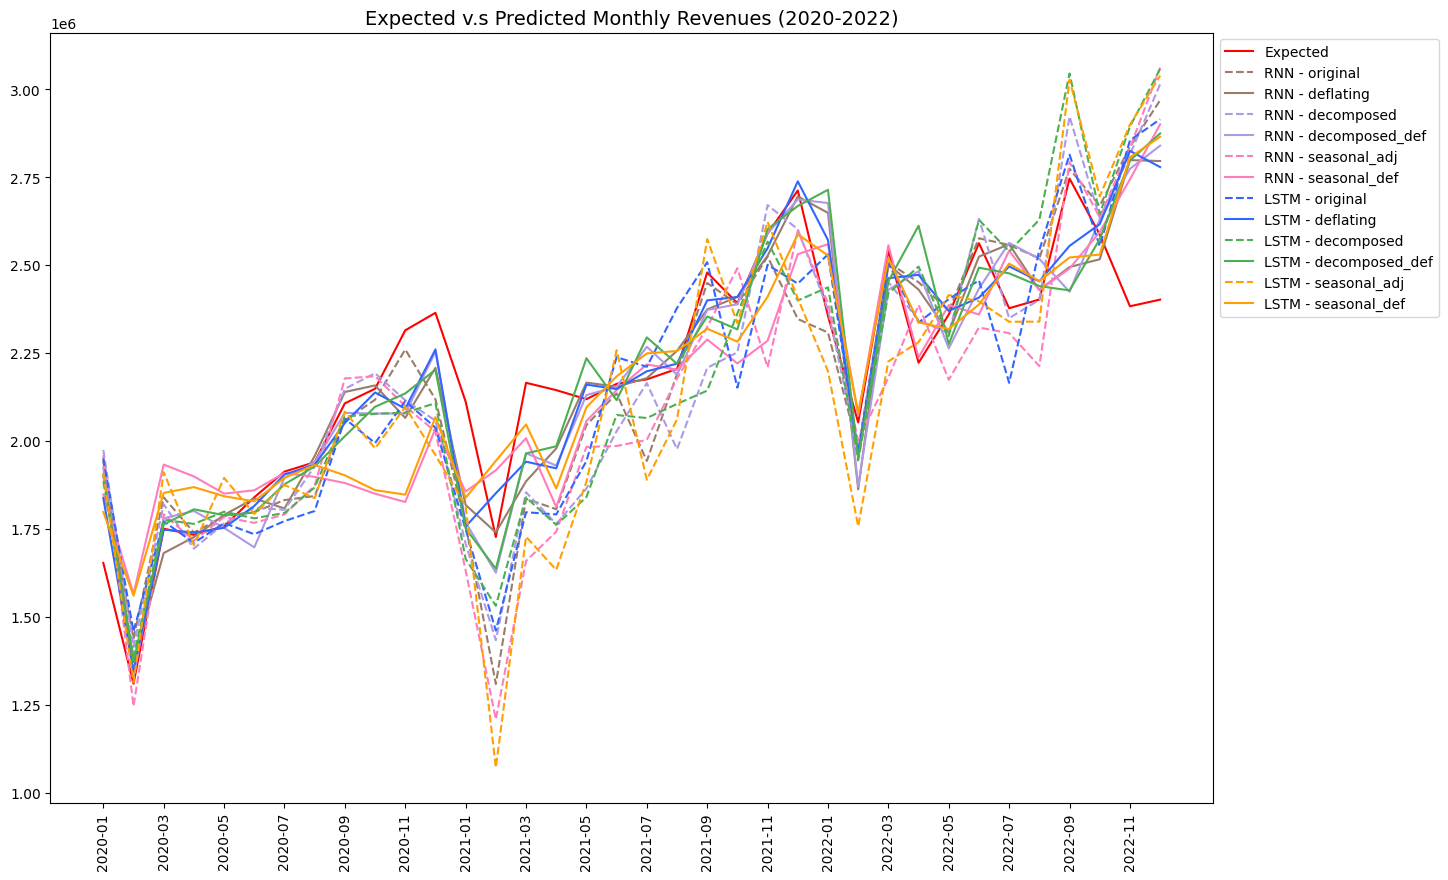

In [ ]:
plotExpectedPredictedRevenues(org_data, pred_rnn, pred_lstm, start_y, nn=True)

#### **8.1.2 分模型畫圖**

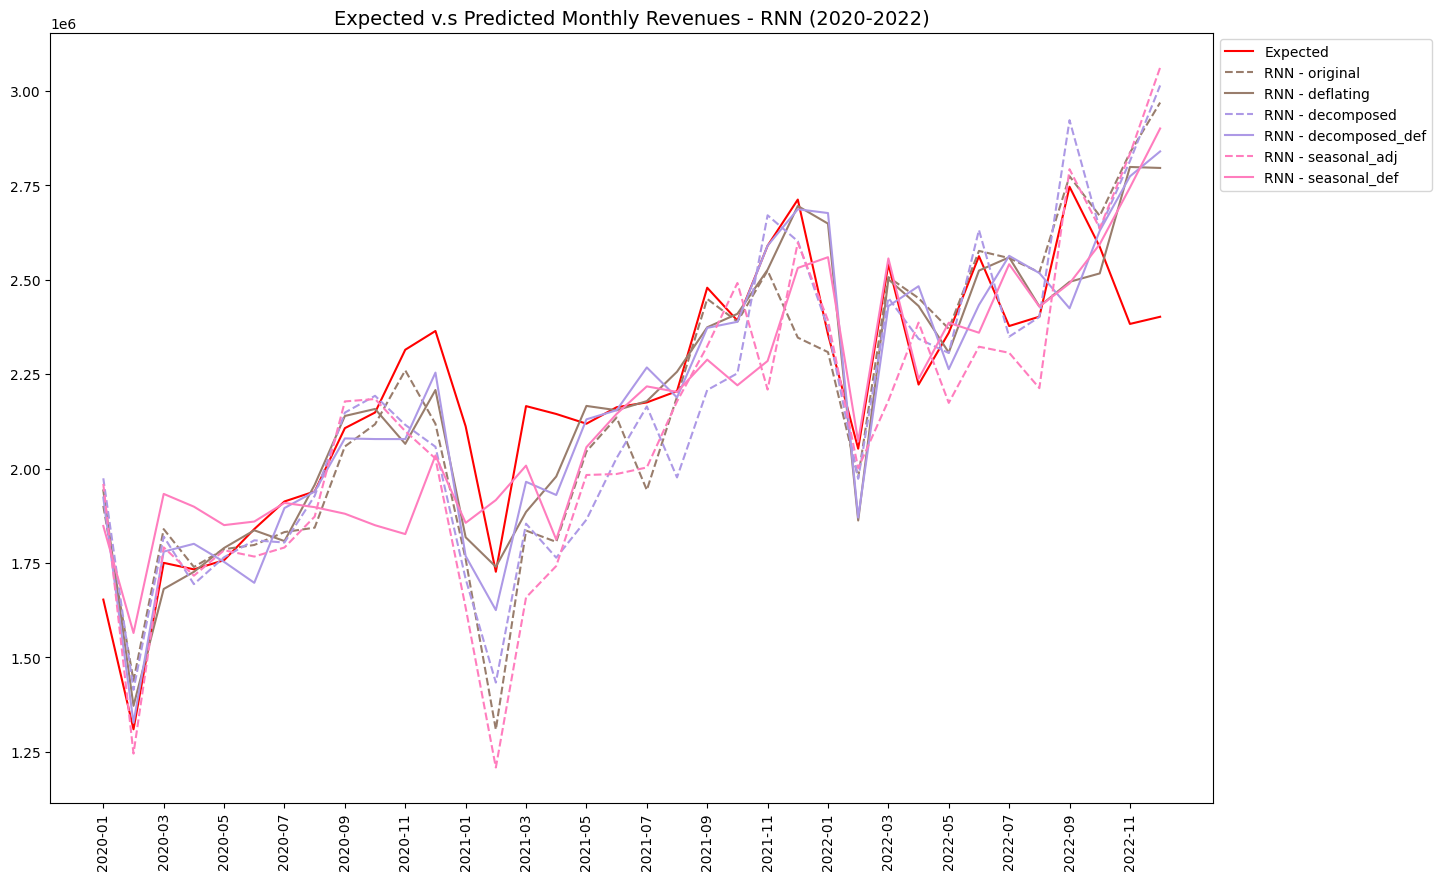

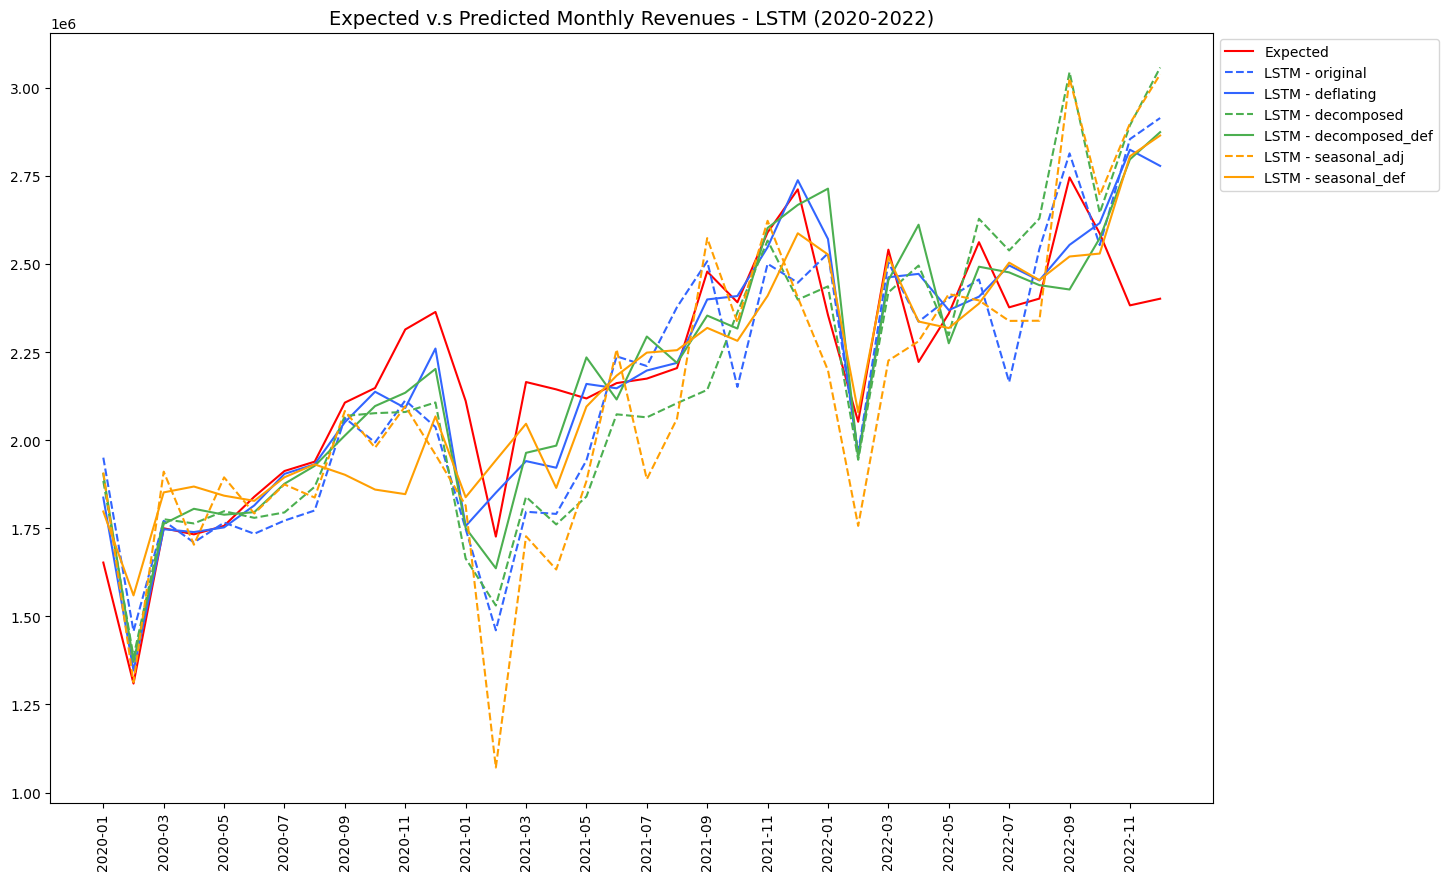

In [ ]:
plotModelExpectedPredictedRevenues(org_data, pred_rnn, 'rnn', start_y)
plotModelExpectedPredictedRevenues(org_data, pred_lstm, 'lstm', start_y)

### **8.2 Scores: RMSE, MAPE, MAE, MAE%**

*   RMSE (Root Mean Square Error)

  $RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^n(\hat{y}_i - y_i)^2}$

<br>

*   MAE (Mean Absolute Error)

  $MAE = \frac{1}{n}\sum_{i=1}^n|\hat{y}_i - y_i|$

<br>

*   MAE% (MAE / mean of the sum of y_true)

  $MAE\% = \frac{\frac{1}{n}\sum_{i=1}^n|\hat{y}_i - y_i|}{\frac{1}{n}\sum_{i=1}^n y_i} = \frac{\sum_{i=1}^n|\hat{y}_i - y_i|}{\sum_{i=1}^n y_i}$

<br>

*   MAPE (Mean Absolute Percentage Error)

  $MAPE(\%) = \frac{1}{n}\sum_{i=1}^n \frac{|\hat{y}_i - y_i|}{y_i}$


#### **8.2.1 Plot All Scores**

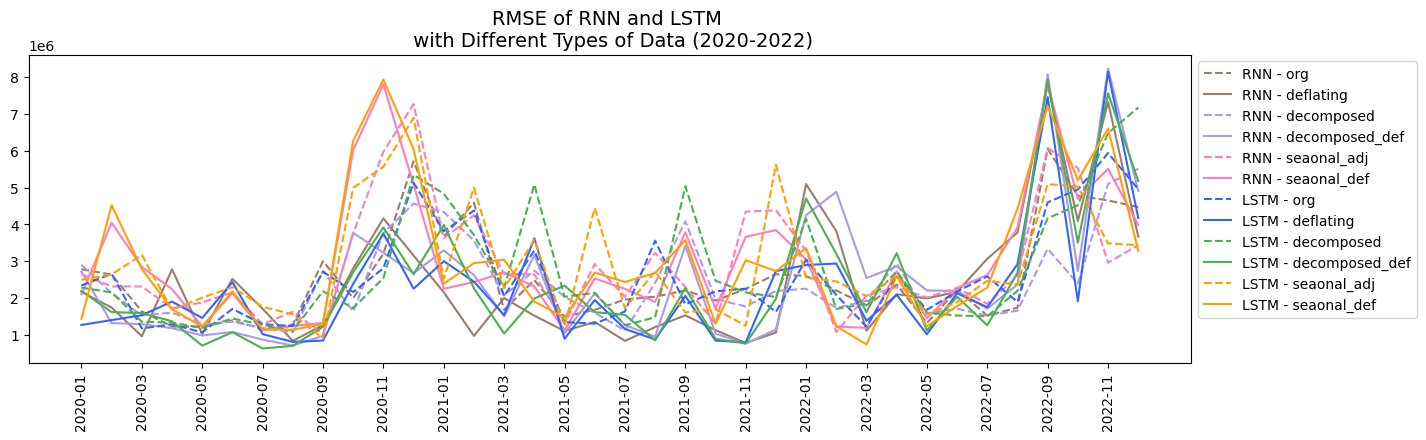

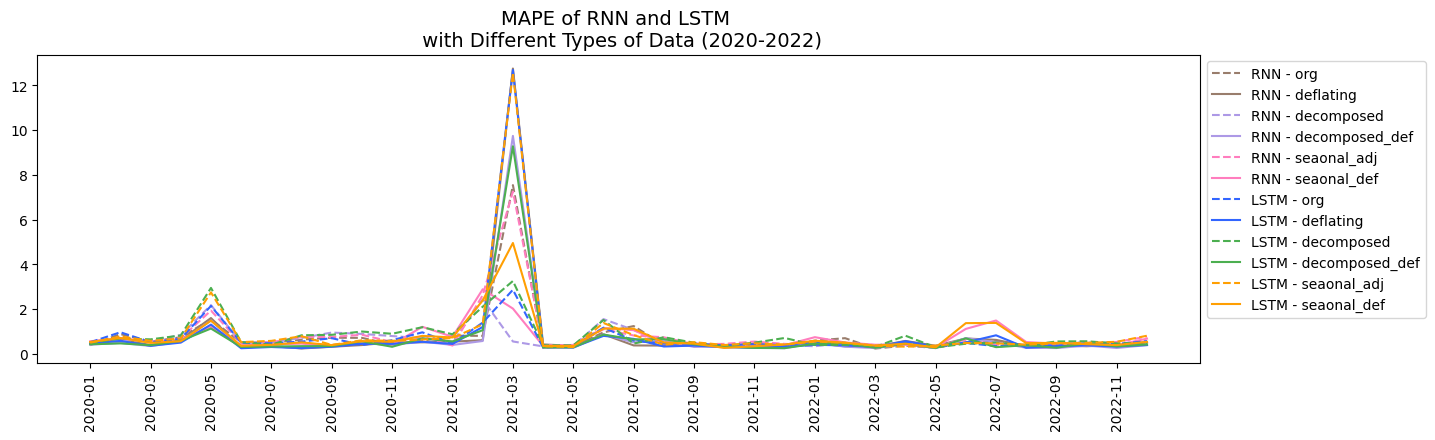

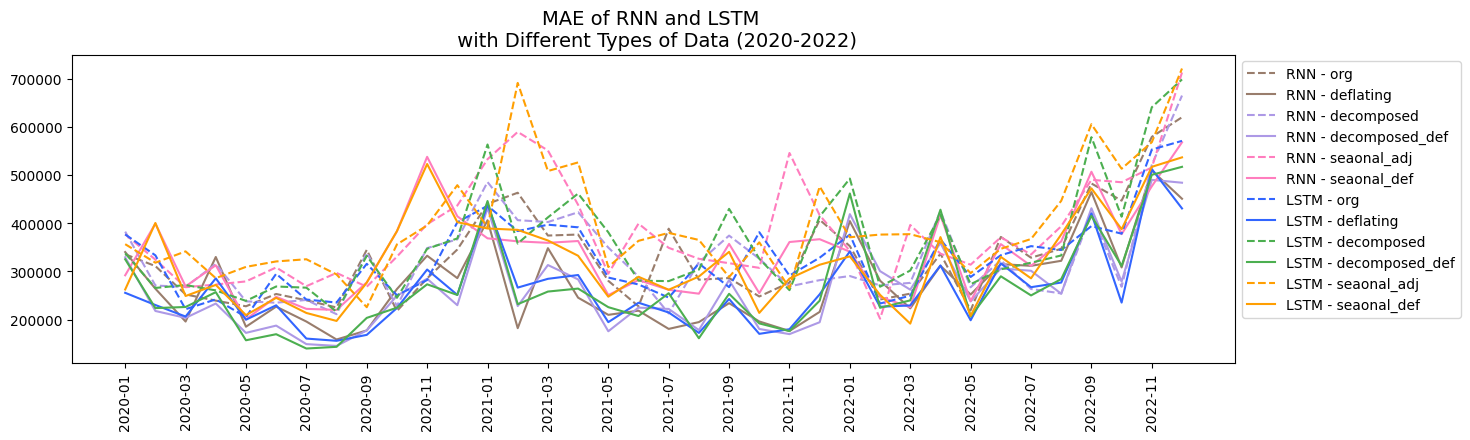

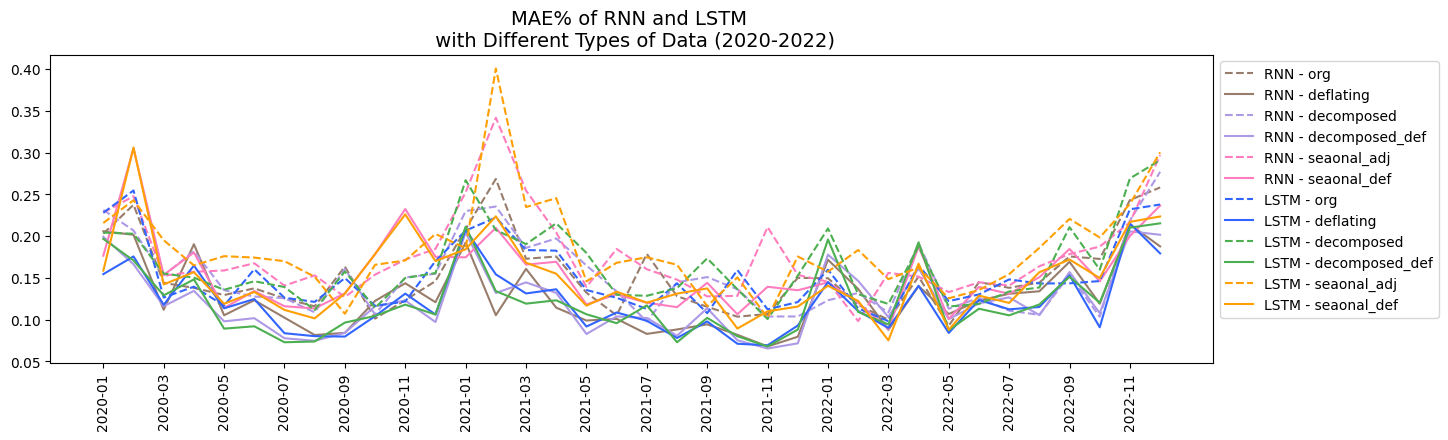

In [ ]:
plotAllScores(scores_rnn, scores_lstm, start_y, nn=True)

#### **8.2.2 分模型畫圖**

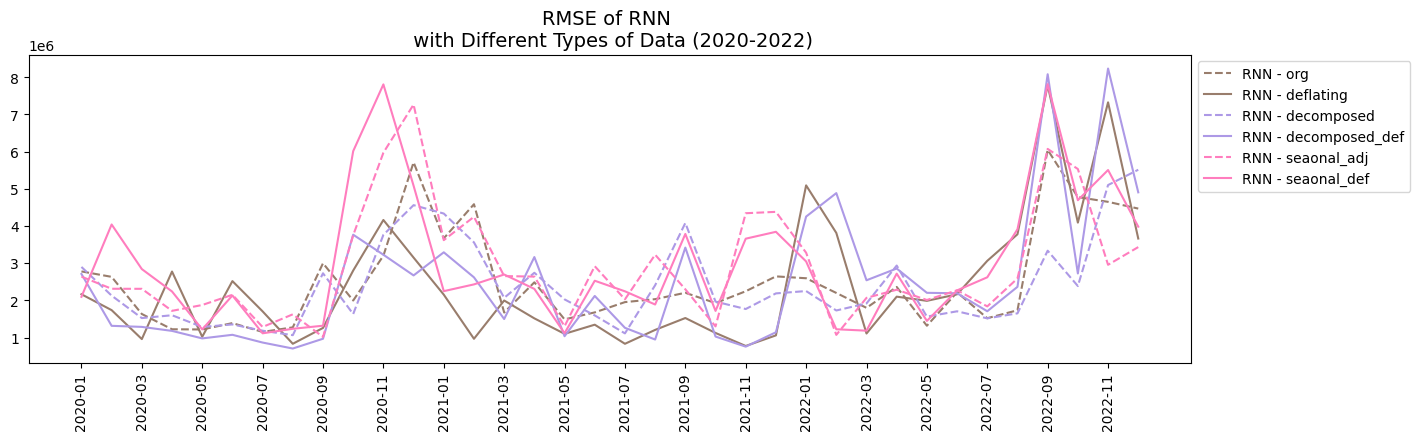

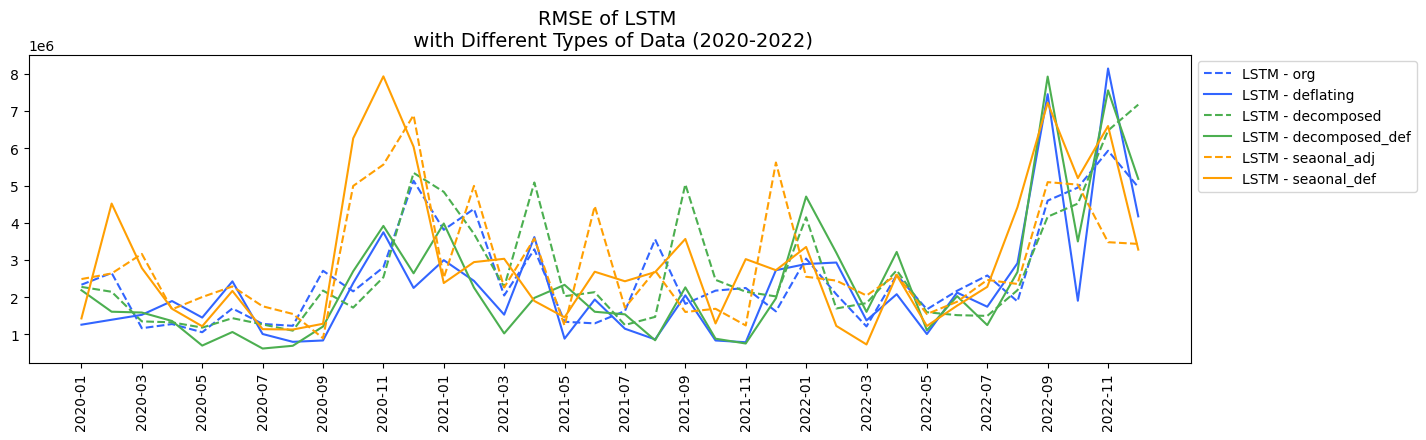

In [ ]:
# RMSE
compareModelScore(scores_rnn, scores_lstm, 'RMSE', start_y, nn=True)  

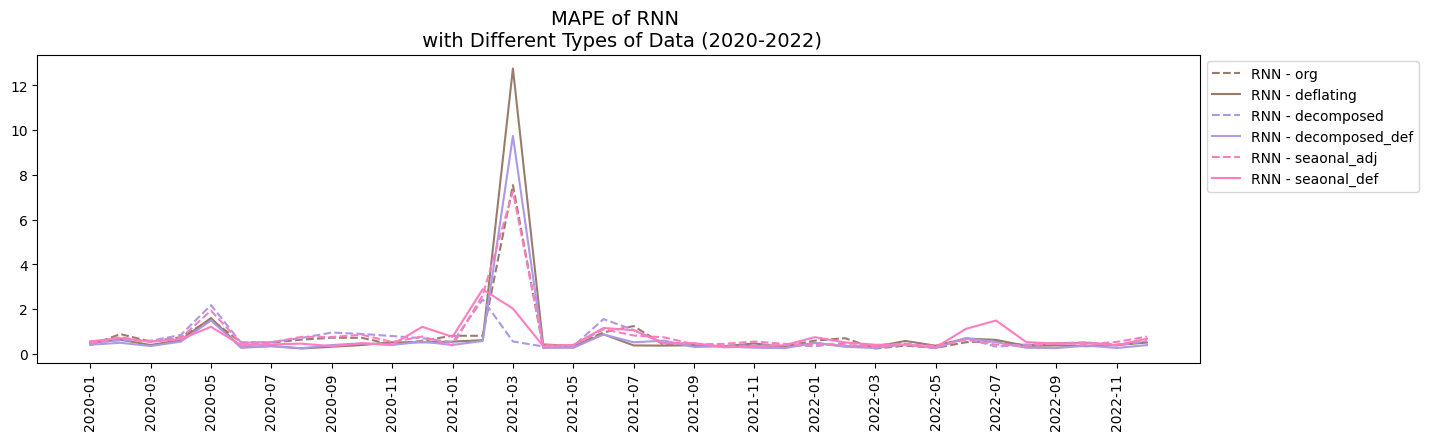

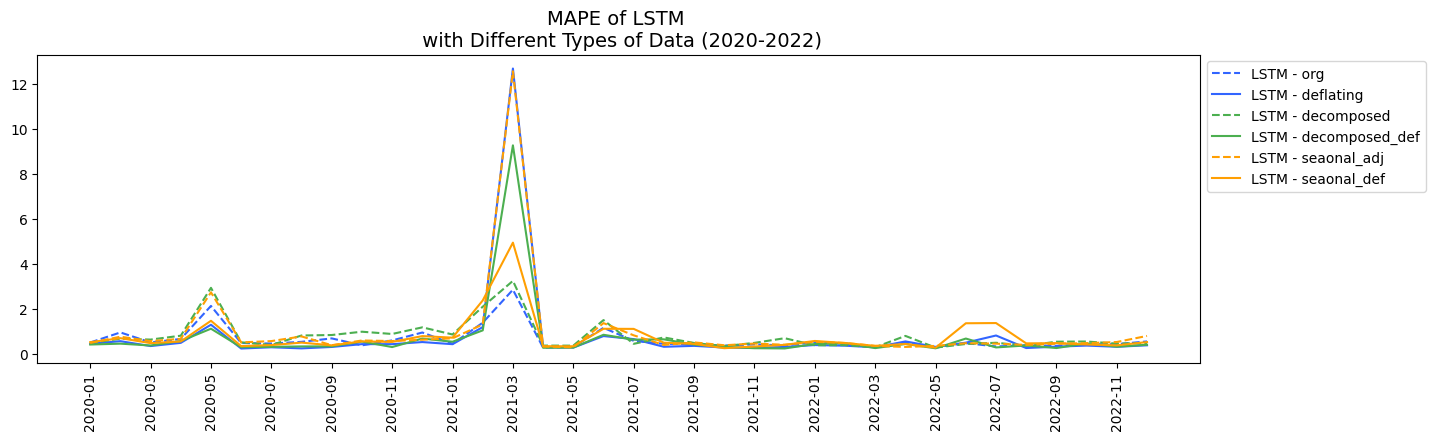

In [ ]:
# MAPE
compareModelScore(scores_rnn, scores_lstm, 'MAPE', start_y, nn=True)  

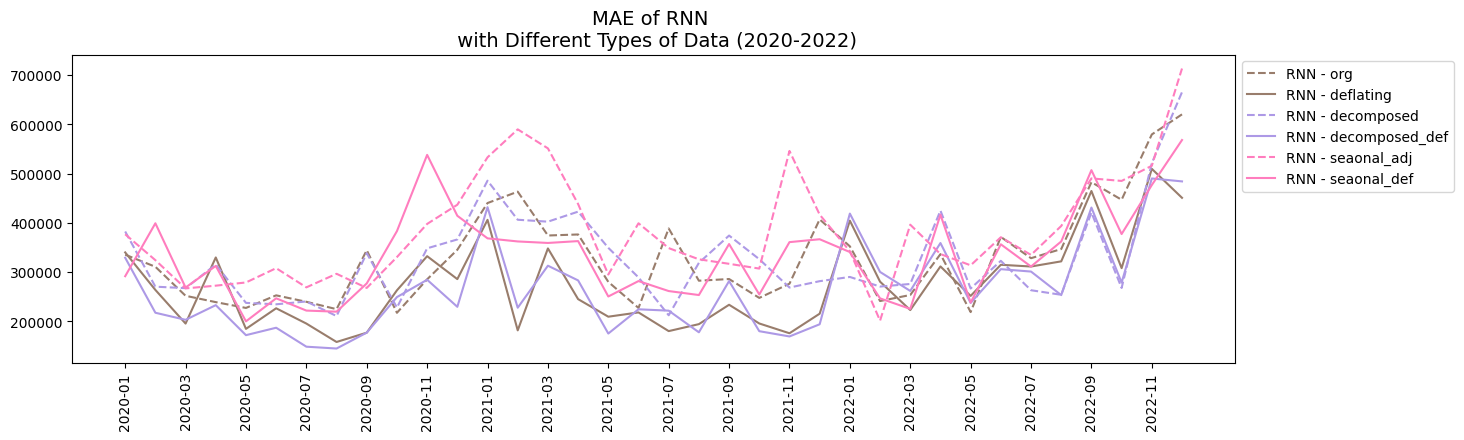

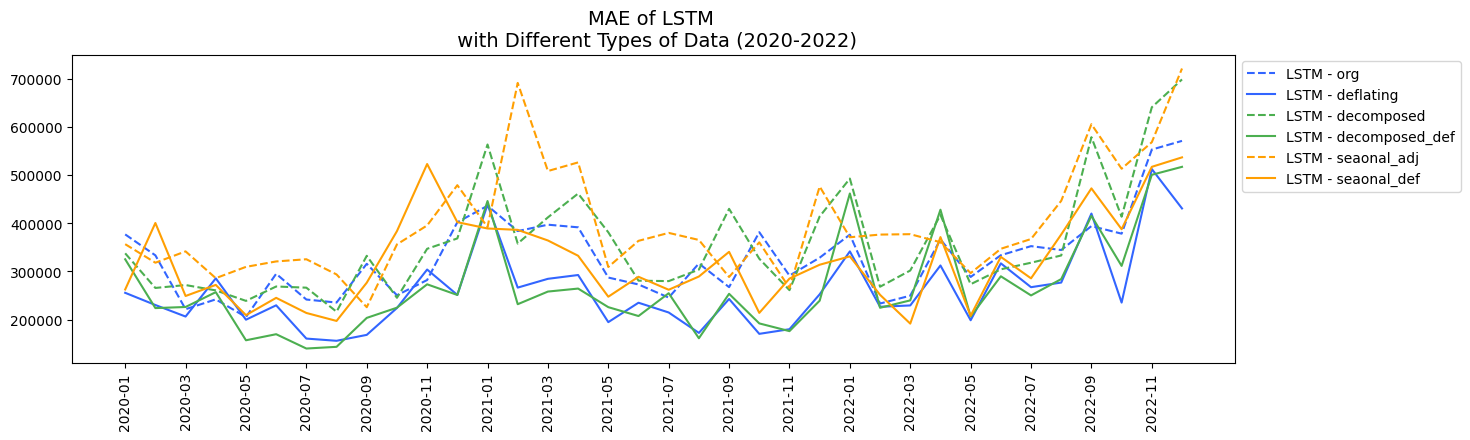

In [ ]:
# MAE
compareModelScore(scores_rnn, scores_lstm, 'MAE', start_y, nn=True)  

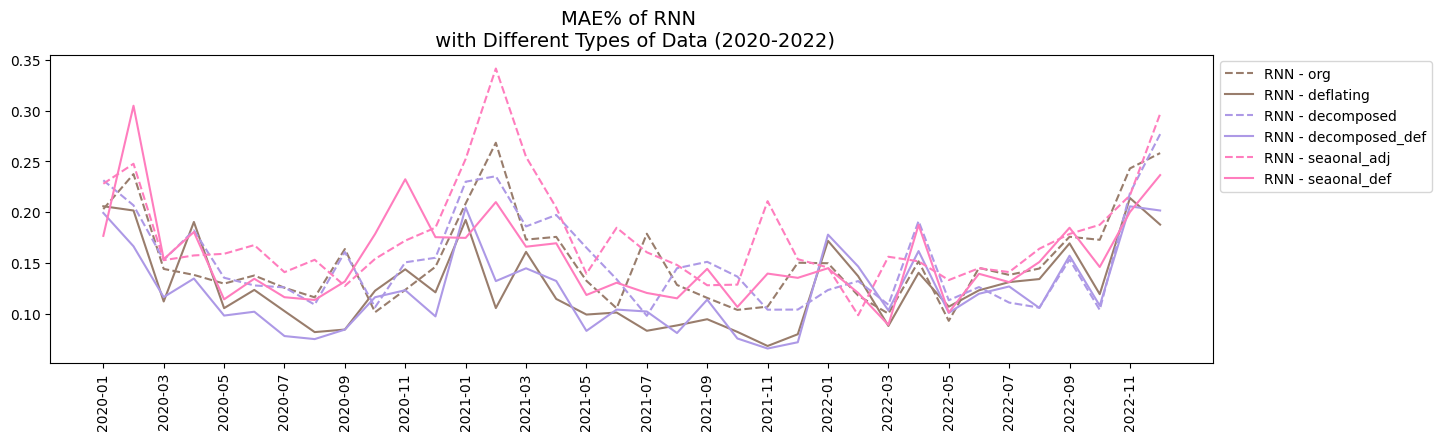

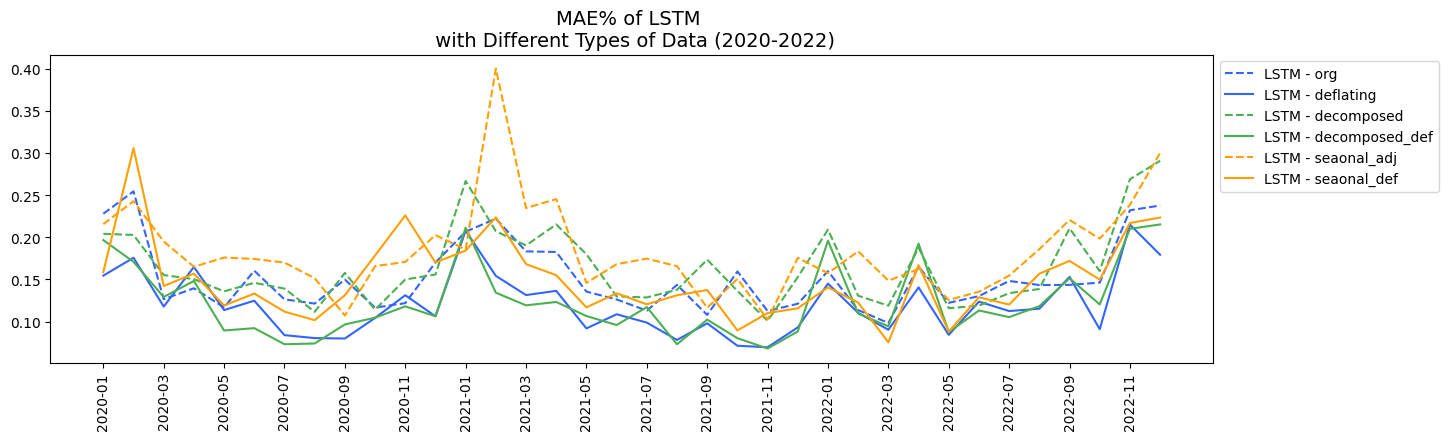

In [ ]:
# MAE%
compareModelScore(scores_rnn, scores_lstm, 'MAE%', start_y, nn=True)  

#### **8.2.3 Boxplot**

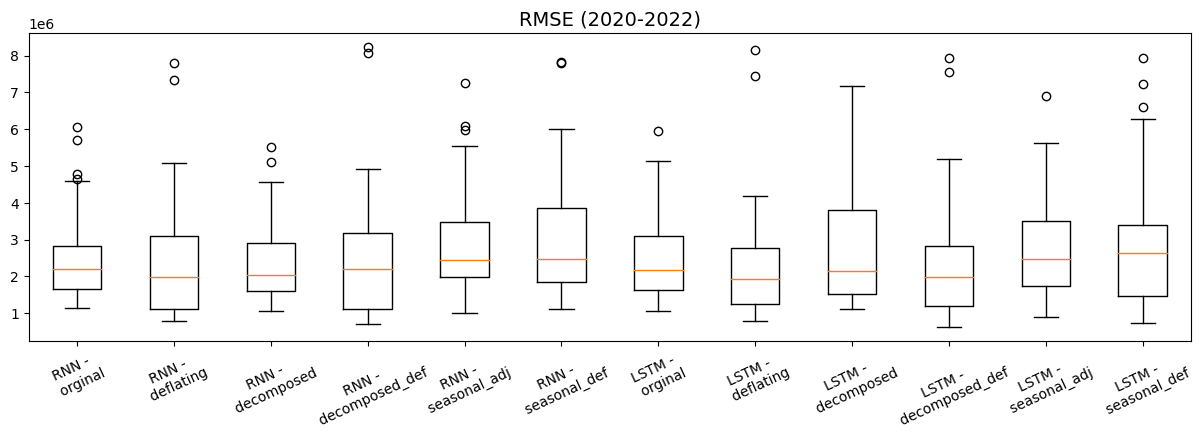

In [ ]:
# RMSE
scoreBoxplotV(scores_rnn, scores_lstm, 'RMSE', start_y, nn=True)  

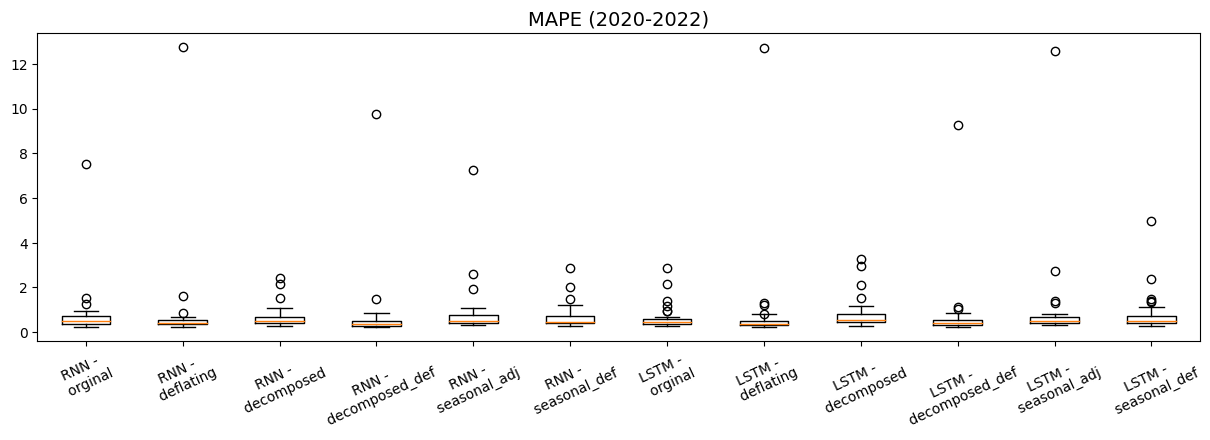

In [ ]:
# MAPE
scoreBoxplotV(scores_rnn, scores_lstm, 'MAPE', start_y, nn=True)  

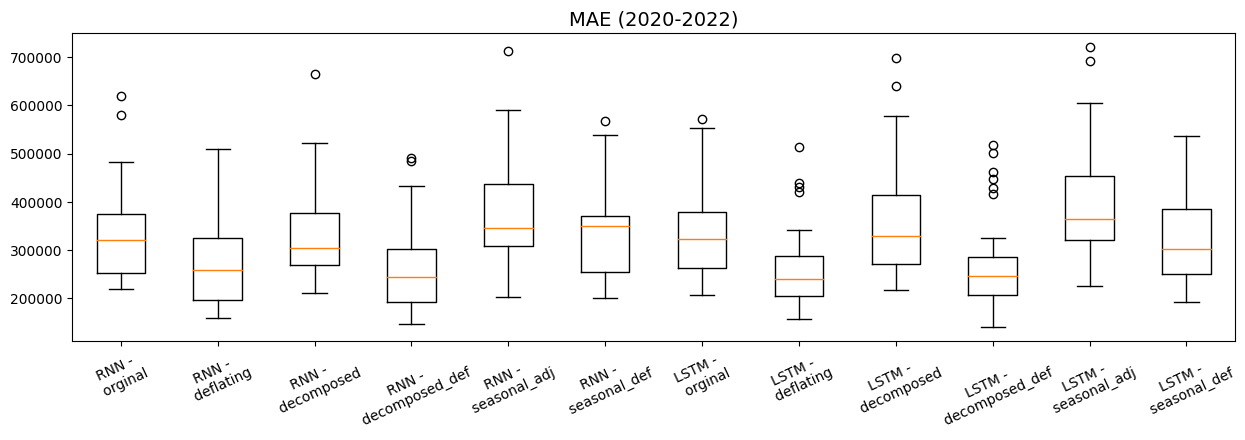

In [ ]:
# MAE
scoreBoxplotV(scores_rnn, scores_lstm, 'MAE', start_y, nn=True)  

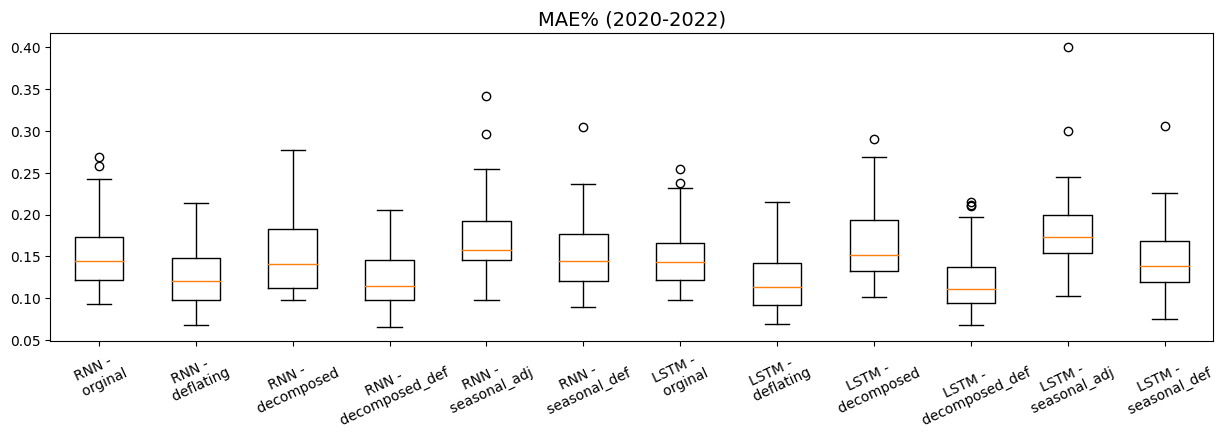

In [ ]:
# MAE%
scoreBoxplotV(scores_rnn, scores_lstm, 'MAE%', start_y, nn=True)  

## **9. Best and Worst Model**

In [ ]:
bw = BestWorstModelNN(scores_rnn, scores_lstm)

### **9.1 各模型組合中，預測最好和最差的月份**

||modelType|dataType|scoreType|Best & Worst Month|Total|
|-|-|-|-|-|-|
|Numbers|2|6|4|2 (fixed)|2x6x4x2 = 96|

#### **9.1.1 RMSE**

In [ ]:
best_rmse, worst_rmse = bw.findBestWorstForAll('RMSE')

##### **最佳月份**

In [ ]:
best_rmse

,modelName,dataType,scoreType,min_month,min_score
0,RNN,org,RMSE,2020-07,1150483.0
4,RNN,def,RMSE,2021-11,772772.0
8,RNN,dec,RMSE,2020-08,1063503.0
12,RNN,dec_def,RMSE,2020-08,704372.0
16,RNN,season,RMSE,2020-09,1015771.0
20,RNN,season_def,RMSE,2020-07,1113554.0
0,LSTM,org,RMSE,2020-05,1060708.0
4,LSTM,def,RMSE,2021-11,792203.0
8,LSTM,dec,RMSE,2020-08,1103347.0
12,LSTM,dec_def,RMSE,2020-07,623163.0


##### **最差月份**

In [ ]:
worst_rmse

,modelName,dataType,scoreType,max_month,max_score
0,RNN,org,RMSE,2022-09,6047450.0
4,RNN,def,RMSE,2022-09,7787765.0
8,RNN,dec,RMSE,2022-12,5512013.0
12,RNN,dec_def,RMSE,2022-11,8233849.0
16,RNN,season,RMSE,2020-12,7265600.0
20,RNN,season_def,RMSE,2022-09,7814075.0
0,LSTM,org,RMSE,2022-11,5936807.0
4,LSTM,def,RMSE,2022-11,8144257.0
8,LSTM,dec,RMSE,2022-12,7174772.0
12,LSTM,dec_def,RMSE,2022-09,7927610.0


#### **9.1.2 MAPE**

In [ ]:
best_mape, worst_mape = bw.findBestWorstForAll('MAPE')

##### **最佳月份**

In [ ]:
best_mape

,modelName,dataType,scoreType,min_month,min_score
3,RNN,org,MAPE,2022-03,0.2271
7,RNN,def,MAPE,2020-08,0.2295
11,RNN,dec,MAPE,2022-05,0.2677
15,RNN,dec_def,MAPE,2020-08,0.2412
19,RNN,season,MAPE,2022-03,0.2977
23,RNN,season_def,MAPE,2022-05,0.2789
3,LSTM,org,MAPE,2021-04,0.2779
7,LSTM,def,MAPE,2020-06,0.2397
11,LSTM,dec,MAPE,2022-05,0.2796
15,LSTM,dec_def,MAPE,2021-12,0.2434


##### **最差月份**

In [ ]:
worst_mape

,modelName,dataType,scoreType,max_month,max_score
3,RNN,org,MAPE,2021-03,7.5405
7,RNN,def,MAPE,2021-03,12.7554
11,RNN,dec,MAPE,2021-02,2.4238
15,RNN,dec_def,MAPE,2021-03,9.7405
19,RNN,season,MAPE,2021-03,7.2500
23,RNN,season_def,MAPE,2021-02,2.8787
3,LSTM,org,MAPE,2021-03,2.8560
7,LSTM,def,MAPE,2021-03,12.6932
11,LSTM,dec,MAPE,2021-03,3.2490
15,LSTM,dec_def,MAPE,2021-03,9.2760


#### **9.1.3 MAE**

In [ ]:
best_mae, worst_mae = bw.findBestWorstForAll('MAE')

##### **最佳月份**

In [ ]:
best_mae

,modelName,dataType,scoreType,min_month,min_score
1,RNN,org,MAE,2020-10,217646.0
5,RNN,def,MAE,2020-08,158428.0
9,RNN,dec,MAE,2020-08,211057.0
13,RNN,dec_def,MAE,2020-08,145146.0
17,RNN,season,MAE,2022-02,201687.0
21,RNN,season_def,MAE,2020-05,200282.0
1,LSTM,org,MAE,2020-05,205167.0
5,LSTM,def,MAE,2020-08,155761.0
9,LSTM,dec,MAE,2020-08,216179.0
13,LSTM,dec_def,MAE,2020-07,139714.0


##### **最差月份**

In [ ]:
worst_mae

,modelName,dataType,scoreType,max_month,max_score
1,RNN,org,MAE,2022-12,620150.0
5,RNN,def,MAE,2022-11,509611.0
9,RNN,dec,MAE,2022-12,665193.0
13,RNN,dec_def,MAE,2022-11,490096.0
17,RNN,season,MAE,2022-12,713099.0
21,RNN,season_def,MAE,2022-12,568064.0
1,LSTM,org,MAE,2022-12,571080.0
5,LSTM,def,MAE,2022-11,512570.0
9,LSTM,dec,MAE,2022-12,698717.0
13,LSTM,dec_def,MAE,2022-12,517146.0


#### **9.1.3 MAE%**

In [ ]:
best_mae_p, worst_mae_p = bw.findBestWorstForAll('MAE%')

##### **最佳月份**

In [ ]:
best_mae_p

,modelName,dataType,scoreType,min_month,min_score
2,RNN,org,MAE%,2022-05,0.0928
6,RNN,def,MAE%,2021-11,0.0680
10,RNN,dec,MAE%,2021-07,0.0978
14,RNN,dec_def,MAE%,2021-11,0.0655
18,RNN,season,MAE%,2022-02,0.0983
22,RNN,season_def,MAE%,2022-03,0.0888
2,LSTM,org,MAE%,2022-03,0.0982
6,LSTM,def,MAE%,2021-11,0.0694
10,LSTM,dec,MAE%,2021-11,0.1008
14,LSTM,dec_def,MAE%,2021-11,0.0679


##### **最差月份**

In [ ]:
worst_mae_p

,modelName,dataType,scoreType,max_month,max_score
2,RNN,org,MAE%,2021-02,0.2684
6,RNN,def,MAE%,2022-11,0.2139
10,RNN,dec,MAE%,2022-12,0.2769
14,RNN,dec_def,MAE%,2022-11,0.2057
18,RNN,season,MAE%,2021-02,0.3416
22,RNN,season_def,MAE%,2020-02,0.3049
2,LSTM,org,MAE%,2020-02,0.2546
6,LSTM,def,MAE%,2022-11,0.2151
10,LSTM,dec,MAE%,2022-12,0.2909
14,LSTM,dec_def,MAE%,2022-12,0.2153


### **9.2 RNN 和 LSTM 各自預測最好和最差的模型組合**

||modelType|dataType|scoreType|Best & Worst Month|Total|
|-|-|-|-|-|-|
|Numbers|2|1|4|2 (fixed)|2x1x4x2 = 16|

#### **9.2.1 RMSE**

##### **最佳模型**

In [ ]:
# RNN
bw.best_rnn['RMSE']

,modelName,dataType,scoreType,min_month,min_score
12,RNN,dec_def,RMSE,2020-08,704372.0


In [ ]:
# LSTM
bw.best_lstm['RMSE']

,modelName,dataType,scoreType,min_month,min_score
12,LSTM,dec_def,RMSE,2020-07,623163.0


##### **最差模型**

In [ ]:
# RNN
bw.worst_rnn['RMSE']

,modelName,dataType,scoreType,max_month,max_score
12,RNN,dec_def,RMSE,2022-11,8233849.0


In [ ]:
# LSTM
bw.worst_lstm['RMSE']

,modelName,dataType,scoreType,max_month,max_score
4,LSTM,def,RMSE,2022-11,8144257.0


#### **9.2.2 MAPE**

##### **最佳模型**

In [ ]:
# RNN
bw.best_rnn['MAPE']

,modelName,dataType,scoreType,min_month,min_score
3,RNN,org,MAPE,2022-03,0.2271


In [ ]:
# LSTM
bw.best_lstm['MAPE']

,modelName,dataType,scoreType,min_month,min_score
7,LSTM,def,MAPE,2020-06,0.2397


##### **最差模型**

In [ ]:
# RNN
bw.worst_rnn['MAPE']

,modelName,dataType,scoreType,max_month,max_score
7,RNN,def,MAPE,2021-03,12.7554


In [ ]:
# LSTM
bw.worst_lstm['MAPE']

,modelName,dataType,scoreType,max_month,max_score
7,LSTM,def,MAPE,2021-03,12.6932


#### **9.2.3 MAE**

##### **最佳模型**

In [ ]:
# RNN
bw.best_rnn['MAE']

,modelName,dataType,scoreType,min_month,min_score
13,RNN,dec_def,MAE,2020-08,145146.0


In [ ]:
# LSTM
bw.best_lstm['MAE']

,modelName,dataType,scoreType,min_month,min_score
13,LSTM,dec_def,MAE,2020-07,139714.0


##### **最差模型**

In [ ]:
# RNN
bw.worst_rnn['MAE']

,modelName,dataType,scoreType,max_month,max_score
17,RNN,season,MAE,2022-12,713099.0


In [ ]:
# LSTM
bw.worst_lstm['MAE']

,modelName,dataType,scoreType,max_month,max_score
17,LSTM,season,MAE,2022-12,721363.0


#### **9.2.4 MAE%**

##### **最佳模型**

In [ ]:
# RNN
bw.best_rnn['MAE%']

,modelName,dataType,scoreType,min_month,min_score
14,RNN,dec_def,MAE%,2021-11,0.0655


In [ ]:
# LSTM
bw.best_lstm['MAE%']

,modelName,dataType,scoreType,min_month,min_score
14,LSTM,dec_def,MAE%,2021-11,0.0679


##### **最差模型**

In [ ]:
# RNN
bw.worst_rnn['MAE%']

,modelName,dataType,scoreType,max_month,max_score
18,RNN,season,MAE%,2021-02,0.3416


In [ ]:
# LSTM
bw.worst_lstm['MAE%']

,modelName,dataType,scoreType,max_month,max_score
18,LSTM,season,MAE%,2021-02,0.4005


### **9.3 所有模型組合中，預測最好和最差的模型組合**

||modelType|dataType|scoreType|Best & Worst Month|Total|
|-|-|-|-|-|-|
|Numbers|1|1|4|2 (fixed)|1x1x4x2 = 8|


#### **9.3.1 RMSE**

##### **最佳模型**

In [ ]:
bw.best_all['RMSE']

,modelName,dataType,scoreType,min_month,min_score
12,LSTM,dec_def,RMSE,2020-07,623163.0


##### **最差模型**

In [ ]:
bw.worst_all['RMSE']

,modelName,dataType,scoreType,max_month,max_score
12,RNN,dec_def,RMSE,2022-11,8233849.0


#### **9.3.2 MAPE**

##### **最佳模型**

In [ ]:
bw.best_all['MAPE']

,modelName,dataType,scoreType,min_month,min_score
3,RNN,org,MAPE,2022-03,0.2271


##### **最差模型**

In [ ]:
bw.worst_all['MAPE']

,modelName,dataType,scoreType,max_month,max_score
7,RNN,def,MAPE,2021-03,12.7554


#### **9.3.3 MAE**

##### **最佳模型**

In [ ]:
bw.best_all['MAE']

,modelName,dataType,scoreType,min_month,min_score
13,LSTM,dec_def,MAE,2020-07,139714.0


##### **最差模型**

In [ ]:
bw.worst_all['MAE']

,modelName,dataType,scoreType,max_month,max_score
17,LSTM,season,MAE,2022-12,721363.0


#### **9.3.4 MAE%**

##### **最佳模型**

In [ ]:
bw.best_all['MAE%']

,modelName,dataType,scoreType,min_month,min_score
14,RNN,dec_def,MAE%,2021-11,0.0655


##### **最差模型**

In [ ]:
bw.worst_all['MAE%']

,modelName,dataType,scoreType,max_month,max_score
18,LSTM,season,MAE%,2021-02,0.4005
